In [ ]:
# Enhancing Lung Sound Classification Using CNN-LSTM and Mel Spectrogram Pre-processing.
# Berikut langkah-langkah yang dilakukan pada penelitian lung sounds.
# 1. Pengumpulan Dataset:
#    Lokasi: /content/drive/MyDrive/Dataset Kaggle.
#    Label dataset: Normal, Crackles, Wheezes, Crackles_Wheezes.
# Jumlah file di folder Normal: 449 (Kaggle)
# Jumlah file di folder Crackles: 514 (ICBHI : 257 + Kaggle : 257)
# Jumlah file di folder Wheezes: 232 (ICBHI : 116 + Kaggle : 116)
# Jumlah file di folder Crackles_Wheezes: 116 (ICBHI : 58 + Kaggle : 58)
# Jumlah kelas: 4
# 2. Pra-pemrosesan:
#    a. Konversi Data Audio ke representasi tensor-float
#    b. Frekuensi sampling dengan target sampling rate sebesar 16 kHz (untuk mencapai keseragaman dan standarisasi).
#    c. Transformasi ke Mel Spectrogram
# 3. Augmentasi data dari Google Brain's SpecAugment".
# Hasil :
# Jumlah data untuk 1_Normal: 514
# Jumlah data untuk 2_Crackles: 514
# Jumlah data untuk 3_Wheezes: 514
# Jumlah data untuk 4_Rhonchi: 514
# Jumlah data untuk 5_Crackles_Wheezes: 514
# 4. 10 Fold Cros Validation
# 5. Menjalankan CNN-LSTM
# evaluasi metrik seperti accuracy, precision, recall, f1_score, auc dan confusion matrix.
#===============================================================================================================================================


In [ ]:
#Import library yang diperlukan
import numpy as np
import matplotlib.pyplot as plt
import os
!pip install librosa
import librosa
import soundfile as sf
!pip install soundfile
import librosa.display
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
#import pywt
from scipy import signal
!pip install tensorflow tensorflow_hub librosa scikit-learn

In [ ]:
## Load packgae drive
from google.colab import drive

In [ ]:
# Memberikan akses kepada Colab / Autorization
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

# Menentukan path direktori utama
direktori_utama = "/content/drive/MyDrive/Dataset Kaggle"

# Menentukan path untuk masing-masing folder
path_normal = os.path.join(direktori_utama, "1_Normal")
path_crackles = os.path.join(direktori_utama, "2_Crackles")
path_wheezes = os.path.join(direktori_utama, "3_Wheezes")
path_crackles_wheezes = os.path.join(direktori_utama, "4_Crackles_Wheezes")

# Mendefinisikan label
labels = ["Normal", "Crackles", "Wheezes", "Crackles_Wheezes"]
num_classes = len(labels)

# Mendapatkan daftar file di masing-masing folder
file_normal = os.listdir(path_normal)
file_crackles = os.listdir(path_crackles)
file_wheezes = os.listdir(path_wheezes)
file_crackles_wheezes = os.listdir(path_crackles_wheezes)

# Menampilkan jumlah file di masing-masing folder
print("Jumlah file di folder Normal:", len(file_normal))
print("Jumlah file di folder Crackles:", len(file_crackles))
print("Jumlah file di folder Wheezes:", len(file_wheezes))
print("Jumlah file di folder Crackles_Wheezes:", len(file_crackles_wheezes))

# Menampilkan jumlah kelas
print("Jumlah kelas:", num_classes)

Jumlah file di folder Normal: 274
Jumlah file di folder Crackles: 257
Jumlah file di folder Wheezes: 116
Jumlah file di folder Crackles_Wheezes: 58
Jumlah kelas: 4


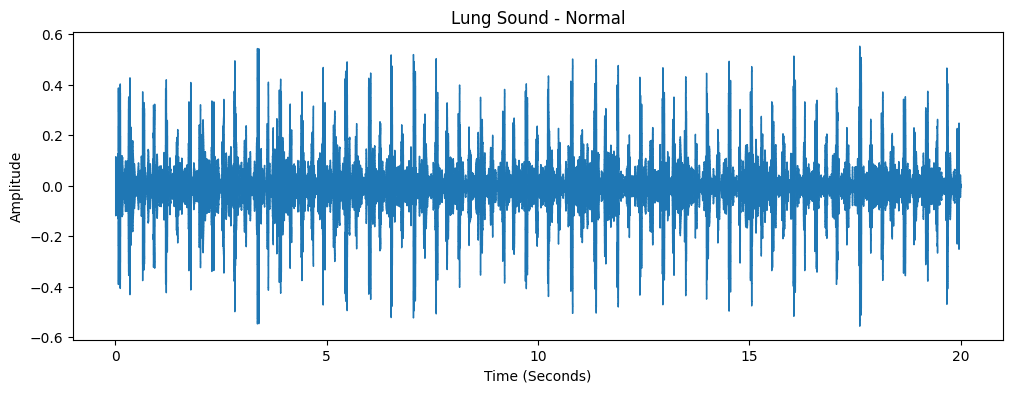

In [ ]:
# Menampilkan sinyal suara paru-paru Normal
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np

# Mengatur path file
file_path = '/content/drive/MyDrive/Dataset Kaggle/1_Normal/Normal_K267.wav'

# Membaca file audio
signal, sr = librosa.load(file_path, sr=None)  # sr=None untuk memastikan menggunakan sample rate asli

# Menghitung waktu (dalam detik) untuk setiap sampel
times = np.arange(len(signal)) / sr

# Membuat plot
plt.figure(figsize=(12, 4))
librosa.display.waveshow(signal, sr=sr)
plt.xlabel('Time (Seconds)')
plt.ylabel('Amplitude')
plt.title('Lung Sound - Normal')
plt.show()

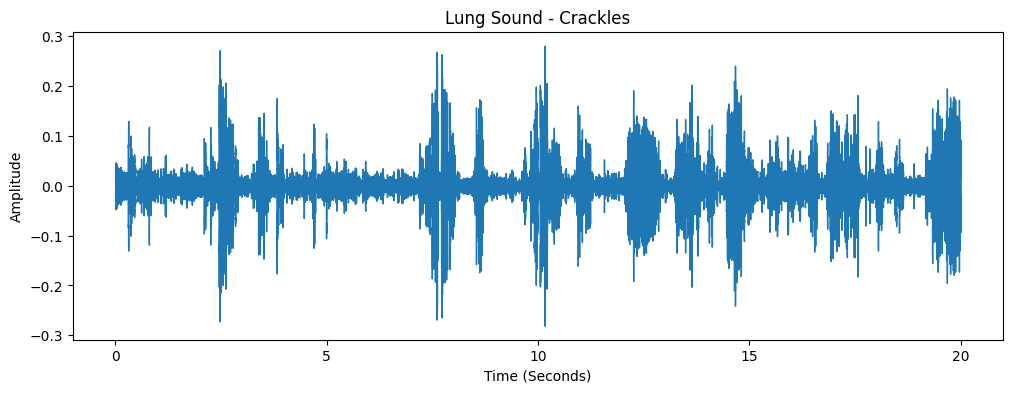

In [ ]:
# Menampilkan sinyal suara paru-paru Crackles
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np

# Mengatur path file
file_path = '/content/drive/MyDrive/Dataset Kaggle/2_Crackles/Crackles_K1.wav'

# Membaca file audio
signal, sr = librosa.load(file_path, sr=None)  # sr=None untuk memastikan menggunakan sample rate asli

# Menghitung waktu (dalam detik) untuk setiap sampel
times = np.arange(len(signal)) / sr

# Membuat plot
plt.figure(figsize=(12, 4))
librosa.display.waveshow(signal, sr=sr)
plt.xlabel('Time (Seconds)')
plt.ylabel('Amplitude')
plt.title('Lung Sound - Crackles')
plt.show()

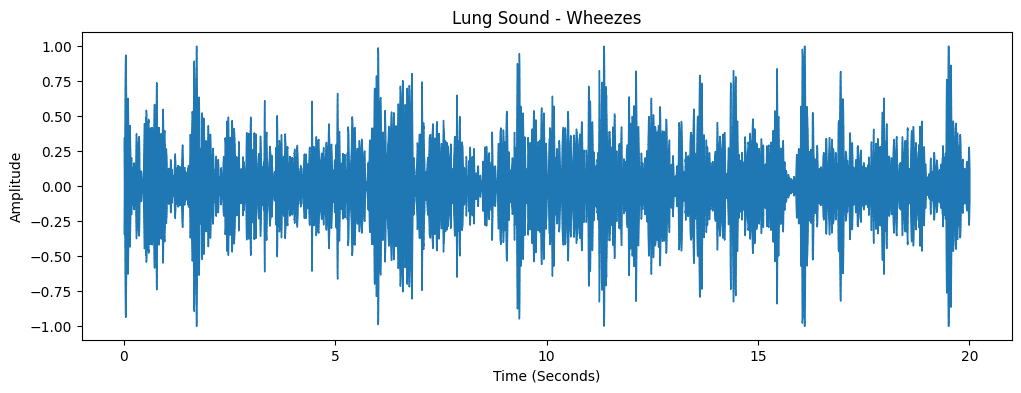

In [ ]:
# Menampilkan sinyal suara paru-paru Wheezes
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np

# Mengatur path file
file_path = '/content/drive/MyDrive/Dataset Kaggle/3_Wheezes/Wheezes_K1.wav'

# Membaca file audio
signal, sr = librosa.load(file_path, sr=None)  # sr=None untuk memastikan menggunakan sample rate asli

# Menghitung waktu (dalam detik) untuk setiap sampel
times = np.arange(len(signal)) / sr

# Membuat plot
plt.figure(figsize=(12, 4))
librosa.display.waveshow(signal, sr=sr)
plt.xlabel('Time (Seconds)')
plt.ylabel('Amplitude')
plt.title('Lung Sound - Wheezes')
plt.show()

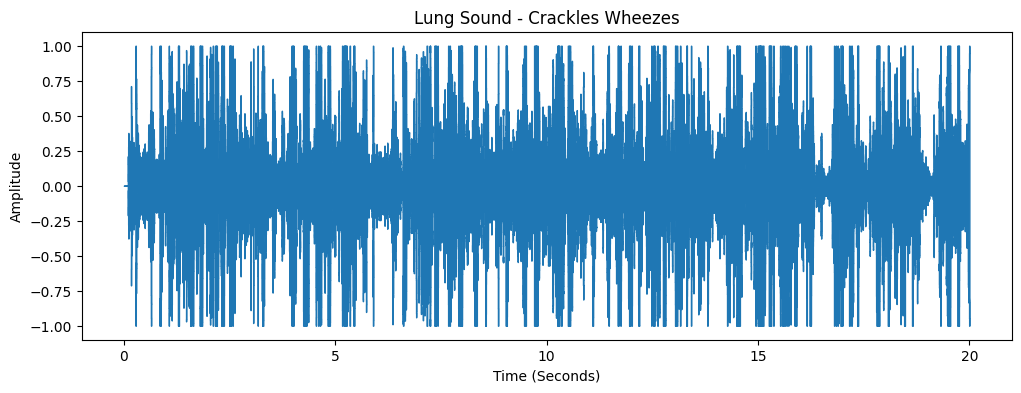

In [ ]:
# Menampilkan sinyal suara paru-paru Crackles Wheezes
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np

# Mengatur path file
file_path = '/content/drive/MyDrive/Dataset Kaggle/4_Crackles_Wheezes/Crackles and Wheezes_K1.wav'

# Membaca file audio
signal, sr = librosa.load(file_path, sr=None)  # sr=None untuk memastikan menggunakan sample rate asli

# Menghitung waktu (dalam detik) untuk setiap sampel
times = np.arange(len(signal)) / sr

# Membuat plot
plt.figure(figsize=(12, 4))
librosa.display.waveshow(signal, sr=sr)
plt.xlabel('Time (Seconds)')
plt.ylabel('Amplitude')
plt.title('Lung Sound - Crackles Wheezes')
plt.show()

In [ ]:
# Konversi Data Audio ke representasi tensor-float
import os
import librosa
import numpy as np

def convert_audio_to_tensor_float(input_path, output_path):
    """
    Converts audio files from the input path to tensor-float representation and saves them to the output path.
    """
    for folder in ["1_Normal", "2_Crackles", "3_Wheezes", "4_Crackles_Wheezes"]:
        input_folder_path = os.path.join(input_path, folder)
        output_folder_path = os.path.join(output_path, folder)

        # Create output directory if it doesn't exist
        os.makedirs(output_folder_path, exist_ok=True)

        for filename in os.listdir(input_folder_path):
            if filename.endswith('.wav'):
                # Load audio file
                file_path = os.path.join(input_folder_path, filename)
                audio_data, sr = librosa.load(file_path, sr=None)

                # Convert audio data to tensor (numpy array)
                audio_tensor = np.array(audio_data, dtype=np.float32)

                # Save tensor to output path
                output_file_path = os.path.join(output_folder_path, filename.replace('.wav', '.npy'))
                np.save(output_file_path, audio_tensor)
                print(f"Processed and saved {output_file_path}")

# Define paths
input_path = "/content/drive/MyDrive/Dataset Kaggle"
output_path = "/content/drive/MyDrive/Dataset Kaggle/A_Konversi Data Audio ke representasi tensor-float"

# Run conversion
convert_audio_to_tensor_float(input_path, output_path)

# Print completion message
print("Proses konversi telah selesai dilakukan.")


In [ ]:
# Menampilkan Jumlah file audio yang berhasil dikonversi ke representasi tensor-float
import os

def count_converted_files(output_path):
    """
    Counts the number of tensor-float files in the output path.
    """
    total_files = 0
    folder_counts = {}

    for folder in ["1_Normal", "2_Crackles", "3_Wheezes", "4_Crackles_Wheezes"]:
        output_folder_path = os.path.join(output_path, folder)
        if os.path.exists(output_folder_path):
            file_count = len([f for f in os.listdir(output_folder_path) if f.endswith('.npy')])
            folder_counts[folder] = file_count
            total_files += file_count

    return folder_counts, total_files

# Define output path
output_path = "/content/drive/MyDrive/Dataset Kaggle/A_Konversi Data Audio ke representasi tensor-float"

# Count converted files
folder_counts, total_files = count_converted_files(output_path)

# Print results
print("Jumlah file yang berhasil dikonversi di setiap folder:")
for folder, count in folder_counts.items():
    print(f"{folder}: {count} file")

print(f"Total file yang berhasil dikonversi: {total_files} file")


Jumlah file yang berhasil dikonversi di setiap folder:
1_Normal: 274 file
2_Crackles: 257 file
3_Wheezes: 116 file
4_Crackles_Wheezes: 58 file
Total file yang berhasil dikonversi: 705 file


In [ ]:
# Frekuensi samping 16kHz
import os
import librosa
import soundfile as sf

def resample_audio(file_path, target_sampling_rate=16000):
    audio, original_sampling_rate = librosa.load(file_path, sr=None, mono=True)
    resampled_audio = librosa.resample(audio, orig_sr=original_sampling_rate, target_sr=target_sampling_rate)
    return resampled_audio

base_path = "/content/drive/MyDrive/Dataset Kaggle"
processed_path = "/content/drive/MyDrive/Dataset Kaggle/B_Frekuensi sampling 16kHz"
folders = ["1_Normal", "2_Crackles","3_Wheezes","4_Crackles_Wheezes"]

for folder in folders:
    folder_path = os.path.join(base_path, folder)
    processed_folder_path = os.path.join(processed_path, folder)

    # Membuat direktori untuk setiap kelas jika belum ada
    if not os.path.exists(processed_folder_path):
        os.makedirs(processed_folder_path)

    audio_files = [f for f in os.listdir(folder_path) if f.endswith('.wav') or f.endswith('.mp3')]
    jumlah_disampling = 0

    for audio_file in audio_files:
        file_path = os.path.join(folder_path, audio_file)
        resampled_audio = resample_audio(file_path, target_sampling_rate=16000)
        output_path = os.path.join(processed_folder_path, audio_file)
        sf.write(output_path, resampled_audio, 16000)
        jumlah_disampling += 1

    print(f"Jumlah file yang telah disampling di folder '{folder}': {jumlah_disampling}")


Jumlah file yang telah disampling di folder '1_Normal': 274
Jumlah file yang telah disampling di folder '2_Crackles': 257
Jumlah file yang telah disampling di folder '3_Wheezes': 116
Jumlah file yang telah disampling di folder '4_Crackles_Wheezes': 58


In [ ]:
# Mengubah dalam bentuk Mel Spectogram
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Direktori sumber dan tujuan
source_base_dir = '/content/drive/MyDrive/Dataset Kaggle/B_Frekuensi sampling 16kHz'
target_base_dir = '/content/drive/MyDrive/Dataset Kaggle/C_Mel Spectogram'
folders = ["1_Normal", "2_Crackles", "3_Wheezes", "4_Crackles_Wheezes"]

# Membuat folder tujuan jika belum ada
for folder in folders:
    target_folder = os.path.join(target_base_dir, folder)
    os.makedirs(target_folder, exist_ok=True)

def create_mel_spectrogram(file_path, save_path):
    # Load file audio
    y, sr = librosa.load(file_path)
    # Mengubah sinyal audio menjadi Mel Spectrogram
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
    S_DB = librosa.power_to_db(S, ref=np.max)

    # Menyimpan Mel Spectrogram sebagai gambar
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(S_DB, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel Spectrogram')
    plt.tight_layout()
    plt.savefig(save_path)
    plt.close()

# Proses setiap folder dan file di dalamnya
for folder in folders:
    source_folder = os.path.join(source_base_dir, folder)
    target_folder = os.path.join(target_base_dir, folder)

    for filename in os.listdir(source_folder):
        if filename.endswith('.wav'):
            source_file_path = os.path.join(source_folder, filename)
            target_file_path = os.path.join(target_folder, os.path.splitext(filename)[0] + '.png')
            create_mel_spectrogram(source_file_path, target_file_path)



In [ ]:
# Menampilkan jumlah file pada masing-masing kelas Mel Spectogram
import os

# Path to the main directory
base_path = "/content/drive/MyDrive/Dataset Kaggle/C_Mel Spectogram"

# List of folders to check
folders = ["1_Normal", "2_Crackles", "3_Wheezes", "4_Crackles_Wheezes"]

# Function to count files in a folder
def count_files_in_folder(folder_path):
    try:
        return len([name for name in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, name))])
    except FileNotFoundError:
        return 0

# Iterate through each folder and count the files
file_counts = {}
for folder in folders:
    folder_path = os.path.join(base_path, folder)
    file_counts[folder] = count_files_in_folder(folder_path)

# Print the results
for folder, count in file_counts.items():
    print(f"Jumlah file di {folder}: {count}")


Jumlah file di 1_Normal: 274
Jumlah file di 2_Crackles: 257
Jumlah file di 3_Wheezes: 116
Jumlah file di 4_Crackles_Wheezes: 58


In [ ]:
# Data Augmentation dengan SpecAugment  (Augmentasi data dari Google Brain's SpecAugment)
import os
import numpy as np
import matplotlib.pyplot as plt
import librosa.display
import shutil
import random

# Definisi SpecAugment
def time_warp(spec, W=5):
    num_rows = spec.shape[1]
    src_pts = np.random.randint(W, num_rows - W, size=1)
    dest_pts = src_pts + np.random.randint(-W, W, size=1)
    spec[:, src_pts] = spec[:, dest_pts]
    return spec

def freq_mask(spec, F=30, num_masks=1):
    cloned = spec.copy()
    num_mel_channels = cloned.shape[0]
    for _ in range(num_masks):
        f = np.random.uniform(0, F)
        f_zero = int(np.random.uniform(0, num_mel_channels - f))
        cloned[f_zero:f_zero + int(f)] = 0
    return cloned

def time_mask(spec, T=40, num_masks=1):
    cloned = spec.copy()
    len_spectro = cloned.shape[1]
    for _ in range(num_masks):
        t = np.random.uniform(0, T)
        t_zero = int(np.random.uniform(0, len_spectro - t))
        cloned[:, t_zero:t_zero + int(t)] = 0
    return cloned

def spec_augment(spec, W=5, F=30, T=40, num_freq_masks=1, num_time_masks=1):
    spec = time_warp(spec, W)
    spec = freq_mask(spec, F, num_freq_masks)
    spec = time_mask(spec, T, num_time_masks)
    return spec

# Path dan folder
input_base_path = '/content/drive/MyDrive/Dataset Kaggle/C_Mel Spectogram'
output_base_path = '/content/drive/MyDrive/Dataset Kaggle/D_Augmentasi data dengan SpecAugment'
folders = ["1_Normal", "2_Crackles", "3_Wheezes", "4_Crackles_Wheezes"]

# Target jumlah data per kelas
target_count = 514
class_counts = {
    "1_Normal": 274,
    "2_Crackles": 257,
    "3_Wheezes": 116,
    "4_Crackles_Wheezes": 58
}

# Buat folder output jika belum ada
if not os.path.exists(output_base_path):
    os.makedirs(output_base_path)

for folder in folders:
    input_folder = os.path.join(input_base_path, folder)
    output_folder = os.path.join(output_base_path, folder)
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Salin file asli ke folder output
    for file_name in os.listdir(input_folder):
        full_file_name = os.path.join(input_folder, file_name)
        if os.path.isfile(full_file_name) and full_file_name.endswith('.png'):  # Pastikan hanya file gambar spektrum mel
            shutil.copy(full_file_name, output_folder)

    # Jika kelas sudah mencapai jumlah target, lanjutkan
    if class_counts[folder] >= target_count:
        continue

    # Augmentasi data hingga mencapai jumlah target
    files = [f for f in os.listdir(input_folder) if f.endswith('.png')]  # Hanya file gambar
    if not files:
        print(f"Tidak ada file gambar ditemukan di folder {input_folder}.")
        continue

    while class_counts[folder] < target_count:
        file_name = random.choice(files)
        full_file_name = os.path.join(input_folder, file_name)

        # Muat gambar spektrum mel
        mel_spec = plt.imread(full_file_name)

        augmented_spec = spec_augment(mel_spec)

        # Simpan hasil augmentasi
        new_file_name = f"aug_{class_counts[folder]}.png"
        output_file = os.path.join(output_folder, new_file_name)

        plt.imsave(output_file, augmented_spec, cmap='viridis')

        class_counts[folder] += 1

# Tampilkan jumlah data per kelas setelah augmentasi
for folder in folders:
    output_folder = os.path.join(output_base_path, folder)
    num_files = len(os.listdir(output_folder))
    print(f"Jumlah data untuk {folder}: {num_files}")


Jumlah data untuk 1_Normal: 514
Jumlah data untuk 2_Crackles: 514
Jumlah data untuk 3_Wheezes: 514
Jumlah data untuk 4_Crackles_Wheezes: 514


In [ ]:
!pip install tensorflow tensorflow_hub librosa scikit-learn


In [ ]:
!pip install tensorflow-hub


In [ ]:
# CNN-LSTM
# 10 Fol Cross Validation
# Setiap Fold selesai dan berhenti, jika running lagi secara manual ke fold berikutnya.
# Menampilkan Accuracy, Precision, Recall, F1-score, AUC, serta visualisasi Confusion Matrix
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from PIL import Image

# Path untuk data dan penyimpanan model
data_dir = '/content/drive/MyDrive/Dataset Kaggle/D_Augmentasi data dengan SpecAugment'
output_dir = '/content/drive/MyDrive/Dataset Kaggle/E_10 Fold Cross Validation'
progress_file = '/content/drive/MyDrive/Dataset Kaggle/E_10 Fold Cross Validation/progress.txt'  # File untuk menyimpan progress
folders = ["1_Normal", "2_Crackles", "3_Wheezes", "5_Crackles_Wheezes"]

# Fungsi untuk load dataset (untuk gambar .png)
def load_dataset(data_dir, folders):
    X = []
    y = []
    class_map = {folder: idx for idx, folder in enumerate(folders)}

    for folder in folders:
        folder_path = os.path.join(data_dir, folder)
        label = class_map[folder]

        for file_name in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file_name)
            # Load gambar menggunakan PIL
            try:
                img = Image.open(file_path).convert('RGB')  # Load gambar dalam mode RGB
                img = img.resize((224, 224))  # Sesuaikan ukuran gambar sesuai dengan input model (224x224)
                img_array = np.array(img)  # Convert gambar ke format numpy array
                img_array = preprocess_input(img_array)  # Preprocess sesuai dengan ResNet50
                X.append(img_array)
                y.append(label)
            except Exception as e:
                print(f"Error loading image {file_name}: {e}")

    return np.array(X), np.array(y)

# Load dataset
X, y = load_dataset(data_dir, folders)

# Initialize KFold for 10 folds
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Step : Modify the ResNet50 model for fine-tuning
def build_finetuned_resnet(num_classes):
    # Load pre-trained ResNet50
    resnet_model = ResNet50(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

    # Unfreeze some of the last layers for fine-tuning
    for layer in resnet_model.layers[-10:]:  # Unfreeze last 10 layers
        layer.trainable = True

    # Add custom layers on top of ResNet50
    x = tf.keras.layers.GlobalAveragePooling2D()(resnet_model.output)  # Global average pooling
    x = tf.keras.layers.BatchNormalization()(x)  # Add batch normalization
    x = tf.keras.layers.Dense(512, activation='relu')(x)  # Dense layer with 512 units
    x = tf.keras.layers.Dropout(0.6)(x)  # Increase dropout to 60%
    x = tf.keras.layers.Dense(128, activation='relu')(x)  # Another dense layer
    x = tf.keras.layers.Dropout(0.6)(x)  # Another dropout
    output = tf.keras.layers.Dense(num_classes, activation='softmax')(x)  # Output layer for num_classes classes

    model = tf.keras.Model(inputs=resnet_model.input, outputs=output)

    # Compile the model with a lower learning rate
    model.compile(optimizer=Adam(learning_rate=1e-5),  # Lower learning rate for fine-tuning
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Fungsi untuk menyimpan progress
def save_progress(fold_index):
    with open(progress_file, 'w') as f:
        f.write(str(fold_index))

# Fungsi untuk memuat progress
def load_progress():
    if os.path.exists(progress_file):
        with open(progress_file, 'r') as f:
            return int(f.read().strip())
    return 0

# Memulai dari fold terakhir yang tersimpan
last_completed_fold = load_progress()

# Step 3: Cross-Validation Loop
metrics = {'fold': [], 'accuracy': [], 'precision': [], 'recall': [], 'f1_score': [], 'auc': [], 'confusion_matrix': []}

fold_index = 1
for train_idx, val_idx in kf.split(X):
    # Lewati fold yang sudah selesai
    if fold_index <= last_completed_fold:
        fold_index += 1
        continue

    print(f'Starting Fold {fold_index}...')

    X_train, X_val = X[train_idx], X[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    # Gunakan ImageDataGenerator hanya untuk scaling data, tanpa augmentasi
    train_datagen = ImageDataGenerator()  # Augmentasi di program sebelumnya akan berlaku
    val_datagen = ImageDataGenerator()

    train_generator = train_datagen.flow(X_train, y_train, batch_size=32)
    val_generator = val_datagen.flow(X_val, y_val, batch_size=32)

    # Build fine-tuned ResNet50 model
    model = build_finetuned_resnet(num_classes=len(folders))

    # Add callbacks for early stopping, learning rate reduction, and model checkpoint
    callbacks = [
        EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-7),  # Reduce learning rate on plateau
        ModelCheckpoint(filepath=os.path.join(output_dir, f'best_model_fold_{fold_index}.h5'), save_best_only=True)
    ]

    # Latih model pada fold ini
    history = model.fit(train_generator, validation_data=val_generator, epochs=50, callbacks=callbacks)  # Increased epochs

    # Prediksi dan evaluasi
    y_pred = np.argmax(model.predict(X_val), axis=1)

    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred, average='weighted')
    recall = recall_score(y_val, y_pred, average='weighted')
    f1 = f1_score(y_val, y_pred, average='weighted')
    auc = roc_auc_score(y_val, model.predict(X_val), multi_class='ovr')
    conf_matrix = confusion_matrix(y_val, y_pred)

    # Simpan metrik
    metrics['fold'].append(fold_index)
    metrics['accuracy'].append(accuracy)
    metrics['precision'].append(precision)
    metrics['recall'].append(recall)
    metrics['f1_score'].append(f1)
    metrics['auc'].append(auc)
    metrics['confusion_matrix'].append(conf_matrix)

    # Tampilkan hasil metrik
    print(f"Results for Fold {fold_index}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"AUC: {auc:.4f}")

    # Plot confusion matrix
    plt.figure(figsize=(10, 8))  # Set the figure size to be wider
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=folders)
    disp.plot(cmap='Blues', values_format='d', ax=plt.gca())  # Use plt.gca() to plot on the current axis
    plt.title(f'Confusion Matrix for Fold {fold_index}')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.show()

    # Simpan model setelah setiap fold
    model.save(os.path.join(output_dir, f'model_fold_{fold_index}.h5'))

    # Simpan progress setelah fold selesai
    save_progress(fold_index)

    # Hentikan program setelah satu fold
    print(f"Fold {fold_index} selesai. Progres disimpan. Silakan lanjutkan program untuk fold berikutnya.")
    break  # Hentikan setelah satu fold

    fold_index += 1

# Simpan hasil evaluasi ke file CSV
metrics_df = pd.DataFrame(metrics)
metrics_df.to_csv(os.path.join(output_dir, 'cross_validation_metrics.csv'), index=False)

print("Cross-validation selesai. Semua model dan hasil telah disimpan di Google Drive.")


In [ ]:
!pip install tensorflow-io
import tensorflow_io as tfio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 MB 19.3 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/usr/local/lib/python3.11/dist-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/usr/local/lib/python3.11/dist-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl8str_util8EndsWithESt17basic_string_viewIcSt11char_traitsIcEES4_']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/usr/local/lib/python3.11/dist-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/usr/local/lib/python3.11/dist-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/usr/local/lib/python3.11/dist-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZN3tsl8str_util9LowercaseB5cxx11ESt17basic_s

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


52/52 ━━━━━━━━━━━━━━━━━━━━ 16s 134ms/step - accuracy: 0.2717 - loss: 1.4078 - val_accuracy: 0.3932 - val_loss: 1.3239
Epoch 2/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - accuracy: 0.3647 - loss: 1.3186 - val_accuracy: 0.4078 - val_loss: 1.2771
Epoch 3/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 89ms/step - accuracy: 0.4107 - loss: 1.2738 - val_accuracy: 0.4636 - val_loss: 1.2334
Epoch 4/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - accuracy: 0.4719 - loss: 1.1955 - val_accuracy: 0.4903 - val_loss: 1.1771
Epoch 5/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - accuracy: 0.5365 - loss: 1.1039 - val_accuracy: 0.5024 - val_loss: 1.1187
Epoch 6/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - accuracy: 0.5620 - loss: 1.0357 - val_accuracy: 0.5170 - val_loss: 1.0747
Epoch 7/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - accuracy: 0.6354 - loss: 0.9257 - val_accuracy: 0.5316 - val_loss: 1.0723
Epoch 8/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - accuracy: 0.6737 - loss: 0.8298 - val_accuracy: 0.5801 - v

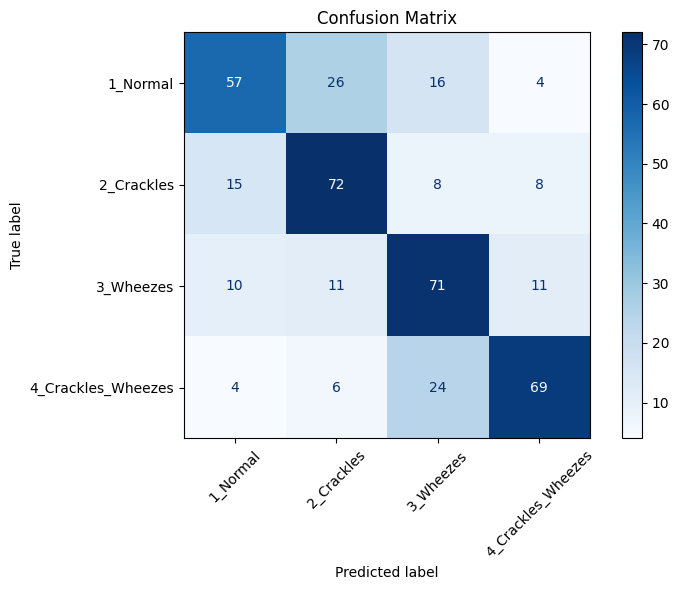

In [ ]:
# CNN-LSTM
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# === Path setup ===
data_dir = '/content/drive/MyDrive/Dataset Kaggle/D_Augmentasi data dengan SpecAugment'
output_dir = '/content/drive/MyDrive/Dataset Kaggle/Model/CNN-LSTM'
folders = ["1_Normal", "2_Crackles", "3_Wheezes", "4_Crackles_Wheezes"]
os.makedirs(output_dir, exist_ok=True)

# === Load dataset ===
def load_dataset(data_dir, folders):
    X, y = [], []
    class_map = {folder: idx for idx, folder in enumerate(folders)}
    for folder in folders:
        folder_path = os.path.join(data_dir, folder)
        label = class_map[folder]
        for file in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file)
            try:
                img = Image.open(file_path).convert('RGB')
                img = img.resize((224, 224))
                img_array = np.array(img) / 255.0
                X.append(img_array)
                y.append(label)
            except Exception as e:
                print(f"Error loading image {file}: {e}")
    return np.array(X), np.array(y)

X, y = load_dataset(data_dir, folders)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

train_gen = tf.keras.preprocessing.image.ImageDataGenerator().flow(X_train, y_train, batch_size=32)
test_gen = tf.keras.preprocessing.image.ImageDataGenerator().flow(X_test, y_test, batch_size=32)

# === CNN (MobileNetV2) + LSTM model ===
def build_mobilenet_lstm_model(input_shape=(224, 224, 3), num_classes=4):
    base_model = tf.keras.applications.MobileNetV2(input_shape=input_shape, include_top=False, weights='imagenet')
    base_model.trainable = False

    inputs = tf.keras.Input(shape=input_shape)
    x = base_model(inputs, training=False)

    shape = tf.keras.backend.int_shape(x)
    x = tf.keras.layers.Reshape((shape[1] * shape[2], shape[3]))(x)
    x = tf.keras.layers.LSTM(128, return_sequences=False)(x)

    x = tf.keras.layers.Dense(128, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

    model = tf.keras.Model(inputs, outputs)
    model.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model = build_mobilenet_lstm_model()

# === Callbacks ===
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    tf.keras.callbacks.ModelCheckpoint(os.path.join(output_dir, 'best_model.keras'), save_best_only=True),
    tf.keras.callbacks.CSVLogger(os.path.join(output_dir, 'training_log.csv'))
]

# === Training ===
history = model.fit(
    train_gen,
    validation_data=test_gen,
    epochs=100,
    callbacks=callbacks
)

# === Save final model ===
model.save(os.path.join(output_dir, 'final_model.keras'))

# === Evaluation ===
y_pred = np.argmax(model.predict(X_test), axis=1)
metrics = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred, average='weighted'),
    "Recall": recall_score(y_test, y_pred, average='weighted'),
    "F1-score": f1_score(y_test, y_pred, average='weighted'),
    "AUC": roc_auc_score(y_test, model.predict(X_test), multi_class='ovr')
}

for k, v in metrics.items():
    print(f"{k}: {v:.4f}")

# === Confusion Matrix ===
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=folders)
disp.plot(cmap='Blues', values_format='d', ax=plt.gca())
plt.title('Confusion Matrix')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
